In [1]:
import tensorflow as tf
import keras
import numpy as np
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

In [3]:
print('Training Images : {}'.format(X_train.shape))
print('Testing Images : {}'.format(X_test.shape))
print('Training Images : {}'.format(y_train.shape))
print('Testing Images : {}'.format(y_test.shape))

Training Images : (50000, 32, 32, 3)
Testing Images : (10000, 32, 32, 3)
Training Images : (50000, 1)
Testing Images : (10000, 1)


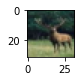

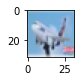

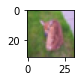

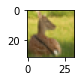

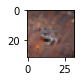

In [4]:
for i in range(343,348):
    plt.subplot(100+1+i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

In [5]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
n_cls = 10

Y_train = np_utils.to_categorical(y_train,n_cls)
Y_test = np_utils.to_categorical(y_test,n_cls)

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [7]:
model = Sequential()

model.add(Conv2D(50,kernel_size = (3,3),strides = (1,1),padding = 'same',activation = 'relu',input_shape = (32,32,3)))
model.add(Conv2D(75,kernel_size = (3,3),strides = (1,1),padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size = (3,3),strides = (1,1),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = 'adam')

model.fit(X_train,Y_train,batch_size = 128,epochs = 20,verbose = 1,validation_data = (X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 147s 376ms/step - loss: 1.5559 - accuracy: 0.4289 - val_loss: 1.1054 - val_accuracy: 0.6102
Epoch 2/20
391/391 [==============================] - 148s 378ms/step - loss: 1.0764 - accuracy: 0.6188 - val_loss: 0.9369 - val_accuracy: 0.6772
Epoch 3/20
391/391 [==============================] - 149s 381ms/step - loss: 0.8974 - accuracy: 0.6851 - val_loss: 0.8060 - val_accuracy: 0.7192
Epoch 4/20
391/391 [==============================] - 172s 439ms/step - loss: 0.7861 - accuracy: 0.7258 - val_loss: 0.7305 - val_accuracy: 0.7495
Epoch 5/20
391/391 [==============================] - 164s 420ms/step - loss: 0.7048 - accuracy: 0.7549 - val_loss: 0.7031 - val_accuracy: 0.7573
Epoch 6/20
391/391 [==============================] - 170s 435ms/step - loss: 0.6345 - accuracy: 0.7791 - val_loss: 0.6742 - val_accuracy: 0.7678
Epoch 7/20
391/391 [==============================] - 162s 415ms/step - loss: 0.5720 - accuracy: 0.7985 - val_loss: 0.6764 -

In [11]:
classes  = range(0,10)
names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']
class_labels = dict(zip(classes,names))

batch = X_test[150:159]
labels = np.argmax(Y_test[150:159],axis = -1)

predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 19ms/step


In [12]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0000001
1.0000001
0.99999976
1.0
1.0
0.9999999


In [13]:
class_result = np.argmax(predictions,axis = -1)
print(class_result)

[8 9 6 0 0 5 2 9 3]


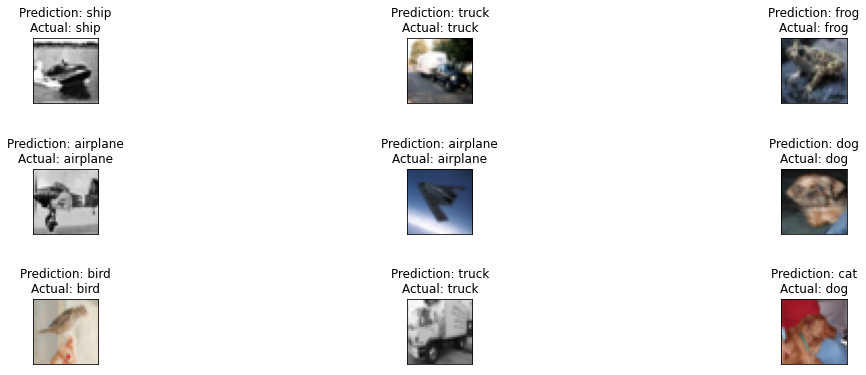

In [14]:
fig,axs = plt.subplots(3,3,figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i , img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    axs[i].imshow(img)

plt.show()